### The Data Science Process

**4. Preprocessing and Modeling**
- Is text data successfully converted to a matrix representation?
- Are methods such as stop words, stemming, and lemmatization explored?
- Does the student properly split and/or sample the data for validation/training purposes?
- Does the student test and evaluate a variety of models to identify a production algorithm (**AT MINIMUM:** Bayes and one other model)?
- Does the student defend their choice of production model relevant to the data at hand and the problem?
- Does the student explain how the model works and evaluate its performance successes/downfalls?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
import_path = r'.\datasets\stocks_eda.csv'
stocks_data = pd.read_csv(import_path)

In [3]:
import_path = r'.\datasets\CryptoCurrency_eda.csv'
CryptoCurrency_data = pd.read_csv(import_path)

In [4]:
df_all_data = pd.concat([stocks_data, CryptoCurrency_data], join='inner', ignore_index=True)

In [5]:
export_path = r'.\datasets\all_data.csv'
df_all_data.to_csv(export_path)

In [6]:
df_all_data.head()

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
0,stocks,What's your thought on ICLN for long term?,As the title says I'm really interested in you...,1622018105,What's your thought on ICLN for long term?As t...,658,42,616
1,stocks,Help investing 50K!!,NaN,1622018005,Help investing 50K!!,20,20,0
2,stocks,Investment into nuclear fusion?,I was doing some more research on fusion for t...,1622017975,Investment into nuclear fusion?I was doing som...,588,31,557
3,stocks,Twitter/Facebook ban in India,NaN,1622015329,Twitter/Facebook ban in India,29,29,0
4,stocks,Royal Helium // North American Helium Industry,NaN,1622011206,Royal Helium // North American Helium Industry,46,46,0


In [7]:
df_all_data.tail()

,subreddit,title,selftext,created_utc,title_selftext,title_selftext_length,title_length,selftext_length
5979,CryptoCurrency,EVERY POST IS PREACHY BULLSHIT!,NaN,1621875281,EVERY POST IS PREACHY BULLSHIT!,31,31,0
5980,CryptoCurrency,Doge army special forces reporting for duty,NaN,1621875270,Doge army special forces reporting for duty,43,43,0
5981,CryptoCurrency,Just Launched 4 hours ago !! 🌕 MOONCHIES 🌕 🚀 F...,NaN,1621875262,Just Launched 4 hours ago !! 🌕 MOONCHIES 🌕 🚀 F...,91,91,0
5982,CryptoCurrency,"A $42,000 Bitcoin Ahead as Bulls Wreck Leverag...",NaN,1621875255,"A $42,000 Bitcoin Ahead as Bulls Wreck Leverag...",66,66,0
5983,CryptoCurrency,How to trade crypto futures responsibly,NaN,1621875249,How to trade crypto futures responsibly,39,39,0


In [8]:
df_all_data.shape

(5984, 8)

In [9]:
# Print English stopwords.
# Stop words will be removed in CountVectorizer OR TfidfVectorizer in Pipeline
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
df_all_data['title_selftext']

0       What's your thought on ICLN for long term?As t...
1                                    Help investing 50K!!
2       Investment into nuclear fusion?I was doing som...
3                           Twitter/Facebook ban in India
4          Royal Helium // North American Helium Industry
                              ...                        
5979                      EVERY POST IS PREACHY BULLSHIT!
5980          Doge army special forces reporting for duty
5981    Just Launched 4 hours ago !! 🌕 MOONCHIES 🌕 🚀 F...
5982    A $42,000 Bitcoin Ahead as Bulls Wreck Leverag...
5983              How to trade crypto futures responsibly
Name: title_selftext, Length: 5984, dtype: object

In [11]:
df_all_data.dtypes

subreddit                object
title                    object
selftext                 object
created_utc               int64
title_selftext           object
title_selftext_length     int64
title_length              int64
selftext_length           int64
dtype: object

In [12]:
df_all_data['title_selftext'] = df_all_data['title_selftext'].astype(str)

In [13]:
df_all_data.dtypes

subreddit                object
title                    object
selftext                 object
created_utc               int64
title_selftext           object
title_selftext_length     int64
title_length              int64
selftext_length           int64
dtype: object

In [14]:
df_all_data['tokenize'] = df_all_data['title_selftext'].apply(word_tokenize)

In [15]:
df_all_data['tokenize']

0       [What, 's, your, thought, on, ICLN, for, long,...
1                            [Help, investing, 50K, !, !]
2       [Investment, into, nuclear, fusion, ?, I, was,...
3                      [Twitter/Facebook, ban, in, India]
4       [Royal, Helium, //, North, American, Helium, I...
                              ...                        
5979              [EVERY, POST, IS, PREACHY, BULLSHIT, !]
5980    [Doge, army, special, forces, reporting, for, ...
5981    [Just, Launched, 4, hours, ago, !, !, 🌕, MOONC...
5982    [A, $, 42,000, Bitcoin, Ahead, as, Bulls, Wrec...
5983       [How, to, trade, crypto, futures, responsibly]
Name: tokenize, Length: 5984, dtype: object

In [16]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()

In [17]:
df_all_data['title_selftext_lemmatize'] = df_all_data['tokenize'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x] )

In [18]:
df_all_data['title_selftext_lemmatize']

0       [What, 's, your, thought, on, ICLN, for, long,...
1                            [Help, investing, 50K, !, !]
2       [Investment, into, nuclear, fusion, ?, I, wa, ...
3                      [Twitter/Facebook, ban, in, India]
4       [Royal, Helium, //, North, American, Helium, I...
                              ...                        
5979              [EVERY, POST, IS, PREACHY, BULLSHIT, !]
5980    [Doge, army, special, force, reporting, for, d...
5981    [Just, Launched, 4, hour, ago, !, !, 🌕, MOONCH...
5982    [A, $, 42,000, Bitcoin, Ahead, a, Bulls, Wreck...
5983        [How, to, trade, crypto, future, responsibly]
Name: title_selftext_lemmatize, Length: 5984, dtype: object

In [19]:
df_all_data['title_selftext_lemmatize'] = df_all_data['title_selftext_lemmatize'].astype(str)

In [20]:
df = df_all_data[['title_selftext_lemmatize', 'subreddit']]

X = df['title_selftext_lemmatize'].fillna(' ')
y = df['subreddit'].values

#### Baseline Score: 
As the number of posts for CryptoCurrency and Stocks are approximately 50% each, the baseline model for a random basis classification, is 50% accuracy for classifying a post correctly.

In [21]:
df['subreddit'].value_counts(normalize=True)

CryptoCurrency    0.500836
stocks            0.499164
Name: subreddit, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

#### First Model - MultinomialNB

Multinomial Naive Bayes classifier is predominantly used in document classification problem, or in our case, posts classification problem, to determine if a document or posts belongs to the category of technology, sports, politics, etc. The features that are used in this classifier are words and the frequency of their occurrence in the document.

If its assumption of the independence of features holds true, it can perform better than other models and requires much less training data. 

However, Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.

In [23]:
pipe = Pipeline([
    ('vec', None),
    ('model', MultinomialNB())
])
params = {
    'vec': [CountVectorizer(), TfidfVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__ngram_range': [(1, 1), (1, 2)],
    'vec__max_df': [.65, .7, .75, .80, .85, .9, .95],
    'vec__min_df': [1, 2, 4, 6],
    'vec__max_features': [1000, 2000, 3000, 4000,5000, 6000],
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', None),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'vec': [CountVectorizer(),
                                 TfidfVectorizer(max_df=0.65, max_features=6000,
                                                 min_df=2,
                                                 stop_words='english')],
                         'vec__max_df': [0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                         'vec__max_features': [1000, 2000, 3000, 4000, 5000,
                                               6000],
                         'vec__min_df': [1, 2, 4, 6],
                         'vec__ngram_range': [(1, 1), (1, 2)],
                         'vec__stop_words': [None, 'english']})

In [24]:
print('best score:', gs.best_score_)

best score: 0.8750045313132366


In [25]:
print('best params:', gs.best_params_)

best params: {'vec': TfidfVectorizer(max_df=0.65, max_features=6000, min_df=2, stop_words='english'), 'vec__max_df': 0.65, 'vec__max_features': 6000, 'vec__min_df': 2, 'vec__ngram_range': (1, 1), 'vec__stop_words': 'english'}


In [26]:
tvec = TfidfVectorizer(stop_words='english', ngram_range=(
    1, 1), max_df=0.65, min_df=2, max_features=6000)
X_train_tvec = tvec.fit_transform(X_train)
X_train_tvec = pd.DataFrame(X_train_tvec.toarray(),
                            columns=tvec.get_feature_names())
X_test_tvec = tvec.transform(X_test)
X_test_tvec = pd.DataFrame(X_test_tvec.toarray(),
                           columns=tvec.get_feature_names())
print('TfidfVectorizer:')
print(X_train_tvec.sum().sort_values(ascending=False)[:5])
print()

TfidfVectorizer:
stock     150.838698
crypto    121.761522
market     82.585642
buy        78.450161
new        72.488827
dtype: float64



In [27]:
nb = MultinomialNB()

In [28]:
nb.fit(X_train_tvec, y_train)

MultinomialNB()

In [29]:
y_pred = nb.predict(X_test_tvec)

In [30]:
print('model accuracy on itself:', nb.score(X_train_tvec, y_train))
print('model accuracy on test set:', nb.score(X_test_tvec, y_test))

model accuracy on itself: 0.9344919786096256
model accuracy on test set: 0.8810160427807486


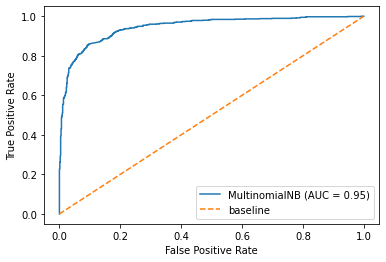

In [31]:
plot_roc_curve(nb, X_test_tvec, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [32]:
roc_auc_score(y_test, nb.predict_proba(X_test_tvec)[:,1])

0.9456312119863521

AUC for a perfect classifier
An ideal classifier does not make any prediction errors. 
This means that the classifier can perfectly separate the two classes such that the model achieves a true positive rate of 100% before producing any false positives. 
Thus, the AUC of such a classifier is 1

AUC of a random classifier
A random classifier will have an AUC close to 0.5. 
This is easy to understand: for every correct prediction, the next prediction will be incorrect.
    
AUC of MultinomialNB of 0.93 shows that it is a good classifier.

In [33]:
confusion_matrix(y_test, # True values.
                 y_pred)  # Predicted values.

array([[675,  74],
       [104, 643]], dtype=int64)

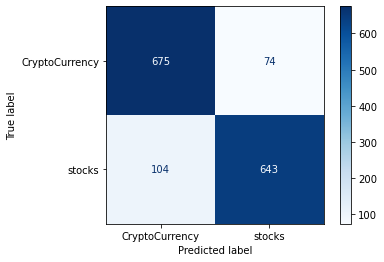

In [34]:
plot_confusion_matrix(nb, X_test_tvec, y_test, cmap='Blues', 
                      values_format='d', display_labels=['CryptoCurrency', 'stocks']);

In [35]:
recall = recall_score(y_test, y_pred, pos_label='CryptoCurrency')
recall

0.9012016021361816

In [36]:
df_all_data['subreddit'] = df_all_data['subreddit'].astype(str)

#### Second model - Random Forest Classifier

Random Forest is an ensemble method that combines multiple decision trees to classify, so the result of random forest is usually better than decision trees.
A forest is comprised of trees. The more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 

Random Forests Classifier has excellent predictive powers. However, it has overfitting risks.

In [37]:
pipe = Pipeline([
    ('vec', None),
    ('rf', RandomForestClassifier())
])
params = {
    'vec': [CountVectorizer(), TfidfVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__ngram_range': [(1, 1), (1, 2)],
    'vec__max_df': [.85, .9, .95],
    'vec__min_df': [1, 2, 4, 6],
    'vec__max_features': [3000,4000,5000],
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],    
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', None),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150, 200],
                         'vec': [CountVectorizer(max_df=0.9, max_features=3000,
                                                 min_df=4),
                                 TfidfVectorizer()],
                         'vec__max_df': [0.85, 0.9, 0.95],
                         'vec__max_features': [3000, 4000, 5000],
                         'vec__min_df': [1, 2, 4, 6],
                         'vec__ngram_range': [(1, 1), (1, 2)],
                         'vec__stop_words': [None, 'english']})

In [38]:
print('best score:', gs.best_score_)

best score: 0.8607409504088114


In [39]:
print('best params:', gs.best_params_)

best params: {'rf__max_depth': None, 'rf__n_estimators': 150, 'vec': CountVectorizer(max_df=0.9, max_features=3000, min_df=4), 'vec__max_df': 0.9, 'vec__max_features': 3000, 'vec__min_df': 4, 'vec__ngram_range': (1, 1), 'vec__stop_words': None}


In [40]:
tvec = TfidfVectorizer(stop_words=None, ngram_range=(
    1, 1), max_df=0.95, min_df=4, max_features=3000)
X_train_tvec = tvec.fit_transform(X_train)
X_train_tvec = pd.DataFrame(X_train_tvec.toarray(),
                            columns=tvec.get_feature_names())
X_test_tvec = tvec.transform(X_test)
X_test_tvec = pd.DataFrame(X_test_tvec.toarray(),
                           columns=tvec.get_feature_names())
print('TfidfVectorizer:')
print(X_train_tvec.sum().sort_values(ascending=False)[:5])
print()

TfidfVectorizer:
the    303.039090
to     275.674449
and    207.671864
is     173.301306
of     169.081122
dtype: float64



In [41]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None)

In [42]:
rf.fit(X_train_tvec, y_train)

RandomForestClassifier(n_estimators=200)

In [43]:
y_pred = rf.predict(X_test_tvec)

In [44]:
print('model accuracy on itself:', rf.score(X_train_tvec, y_train))
print('model accuracy on test set:', rf.score(X_test_tvec, y_test))

model accuracy on itself: 0.9919786096256684
model accuracy on test set: 0.8669786096256684


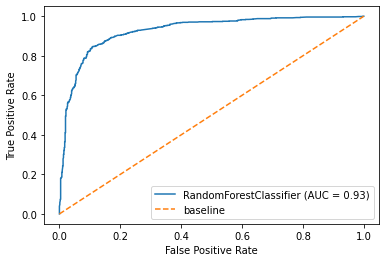

In [45]:
plot_roc_curve(rf, X_test_tvec, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

AUC of RandomForestClassifier of 0.93 shows that it is a good classifier.

In [46]:
roc_auc_score(y_test, rf.predict_proba(X_test_tvec)[:,1])

0.9265866313496086

In [47]:
confusion_matrix(y_test, # True values.
                 y_pred)  # Predicted values.

array([[664,  85],
       [114, 633]], dtype=int64)

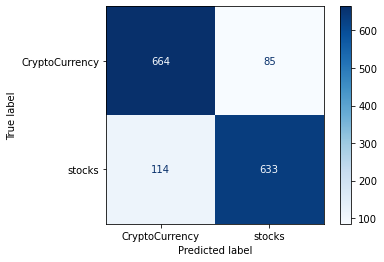

In [48]:
plot_confusion_matrix(rf, X_test_tvec, y_test, cmap='Blues', 
                      values_format='d', display_labels=['CryptoCurrency', 'stocks']);

In [49]:
recall = recall_score(y_test, y_pred, pos_label='CryptoCurrency')
recall

0.8865153538050734

#### Third Model - Support Vector Classifier

SVMs are based on the idea of finding a hyperplane that best divides a dataset into two classes or more.
A hyperplane as a line that linearly (or non-linearly) separates and classifies a set of data.

Support Vector Classifier is highly accurate and Works well on smaller cleaner datasets. However, it is less effective on noisier datasets with overlapping classes.

In [50]:
pipe = Pipeline([
    ('vec', None),
    ('svc', SVC(probability=True))
])
params = {
    'vec': [CountVectorizer(), TfidfVectorizer()],
    'vec__stop_words': [None, 'english'],
    'vec__ngram_range': [(1, 1), (1, 2)],
    'vec__max_df': [.85, .9, .95],
    'vec__min_df': [2, 4, 6],
    'vec__max_features': [1000, 2000, 3000],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}
gs = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vec', None),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'vec': [CountVectorizer(),
                                 TfidfVectorizer(max_df=0.85, max_features=3000,
                                                 min_df=6)],
                         'vec__max_df': [0.85, 0.9, 0.95],
                         'vec__max_features': [1000, 2000, 3000],
                         'vec__min_df': [2, 4, 6],
                         'vec__ngram_range': [(1, 1), (1, 2)],
                         'vec__stop_words': [None, 'english']})

In [51]:
print('best score:', gs.best_score_)

best score: 0.8718862429330135


In [52]:
print('best params:', gs.best_params_)

best params: {'svc__kernel': 'rbf', 'vec': TfidfVectorizer(max_df=0.85, max_features=3000, min_df=6), 'vec__max_df': 0.85, 'vec__max_features': 3000, 'vec__min_df': 6, 'vec__ngram_range': (1, 1), 'vec__stop_words': None}


In [53]:
tvec = TfidfVectorizer(stop_words=None, ngram_range=(
    1, 1), max_df=0.85, min_df=6, max_features=3000)
X_train_tvec = tvec.fit_transform(X_train)
X_train_tvec = pd.DataFrame(X_train_tvec.toarray(),
                            columns=tvec.get_feature_names())
X_test_tvec = tvec.transform(X_test)
X_test_tvec = pd.DataFrame(X_test_tvec.toarray(),
                           columns=tvec.get_feature_names())
print('TfidfVectorizer:')
print(X_train_tvec.sum().sort_values(ascending=False)[:5])
print()

TfidfVectorizer:
the    304.055001
to     276.401796
and    208.541708
is     173.849396
of     169.310078
dtype: float64



In [54]:
svc = SVC(gamma="scale", probability=True, kernel='rbf')

In [55]:
svc.fit(X_train_tvec, y_train)

SVC(probability=True)

In [56]:
y_pred = svc.predict(X_test_tvec)

In [57]:
print('model accuracy on itself:', svc.score(X_train_tvec, y_train))
print('model accuracy on test set:', svc.score(X_test_tvec, y_test))

model accuracy on itself: 0.9783868092691622
model accuracy on test set: 0.8897058823529411


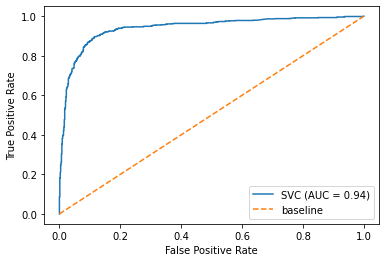

In [58]:
plot_roc_curve(svc, X_test_tvec, y_test)
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

In [59]:
roc_auc_score(y_test, svc.predict_proba(X_test_tvec)[:,1])

0.9406240895938003

AUC of SVC of 0.94 shows that it is a good classifier.

In [60]:
confusion_matrix(y_test, # True values.
                 y_pred)  # Predicted values.

array([[661,  88],
       [ 77, 670]], dtype=int64)

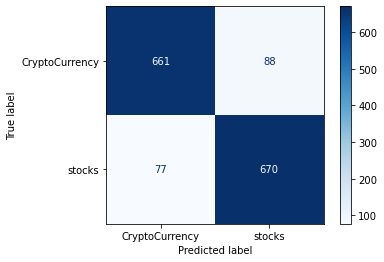

In [61]:
plot_confusion_matrix(svc, X_test_tvec, y_test, cmap='Blues', 
                      values_format='d', display_labels=['CryptoCurrency', 'stocks']);

In [62]:
recall = recall_score(y_test, y_pred, pos_label='CryptoCurrency')
recall

0.8825100133511349

### The Data Science Process

**5. Evaluation and Conceptual Understanding**
- Does the student accurately identify and explain the baseline score?
- Does the student select and use metrics relevant to the problem objective?
- Does the student interpret the results of their model for purposes of inference?
- Is domain knowledge demonstrated when interpreting results?
- Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?

#### Summary of Scores:

|Model - MultinomialNB|Train|Test|
|---|---|---|
Score|0.9345|0.8810	
roc_auc_score|NA|0.9456
recall|NA|0.9012

|Model - SupportVectorClassifier|Train|Test|
|---|---|---|
Score|0.9784|0.8897	
roc_auc_score|NA|0.9406
recall|NA|0.8825

|Model - RandomForestClassifier|Train|Test|
|---|---|---|
Score|0.9920|0.8656	
roc_auc_score|NA|0.9288
recall|NA|0.8852

#### Baseline Score: 
As the number of posts for CryptoCurrency and Stocks are approximately 50% each, the baseline model for a random basis classification, is 50% accuracy for classifying a post correctly.

We have established that our objective is to correctly classify whether a posting Belongs to Crypto subreddit OR Belongs to Other subreddit.
This is a binary classification problem. 
As such, we have decided to use Sensitivity score (or recall), also known as True Positive Rate.
To re-word it, among all the posts, how many CryptoCurrency posts did we classify it correctly?

Recall is True Positives (TP) / All Positives (TP + False Negative (FN)- Actually Crypto but classified as stocks)

From the model with the highest recall score - Multinomial Naive Bayes Classifier, we can see the highest recall score is 0.9012. 

Recall tells us, what fraction of all the posts that are originally CryptoCurrency are classified as CryptoCurrency. We can see that 90.12% of CryptoCurrency posts are correctly classified as CryptoCurrency.

The Multinomial Naive Bayes Classifier beats the baseline score of 50% by a big margin and is therefore a good model to be used in the classification.

### The Data Science Process

**6. Conclusion and Recommendations**
- Does the student provide appropriate context to connect individual steps back to the overall project?
- Is it clear how the final recommendations were reached?
- Are the conclusions/recommendations clearly stated?
- Does the conclusion answer the original problem statement?
- Does the student address how findings of this research can be applied for the benefit of stakeholders?
- Are future steps to move the project forward identified?

#### Conclusion:
    
Web Scraping subreddits:
CryptoCurrency, stocks

Data Exploration / Cleaning:
Subreddit, Title+Selftext

Natural Language Processing:
Stopwords, Tokenize, Lemmatize

Modelling:
Multinomial Naive Bayes Classifier, RandomForestClassifier, SupportVectorClassifier

Evaluation:
Multinomial Naive Bayes Classifier using Sensitivity(Recall)

#### Recommendations:

Background:
We have indicated in the Problem Statement that our objective is to use the model to look for postings in other social media channels (e.g. Facebook, Youtube) to target our advertising of crypto products in these channels so that we can expand the market penetration of our crypto products to potential prospects.

Therefore, our recommendation is:

1. Advertise to posts that our model tagged as interested in CryptoCurrency.

Spend the advertising dollars on True Positive-675 posts (True Crypto and classified correctly as Crypto) + False Negatives-74 posts (True Crypto but classified wrongly as stocks) = 749 posts

Instead of advertising to whole population of 675 (True Positives) + 74 (False Negatives) + 104 (False Positive) + 643 (True Negatives) = 1496 posts


#### Future Steps

1. Train on more subreddits to make the model more robust to different unknown datasets.

2. Train our model on different social media sites e.g. Youtube comments

3. Train on CryptoCurrency news articles so as to ennrich the model with CryptoCurrency keywords.

4. Get more data